In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles

from dojo.nn import NeuralNetwork
from dojo.nn.layers import Dense, Dropout
from dojo.optimizers import Adam
from dojo.plot import plot_decision_boundary

## Load the dataset

In [2]:
X, y = make_circles(n_samples=1_000, noise=0.2, factor=0.1)

assert len(X) == len(y)

## Quick EDA

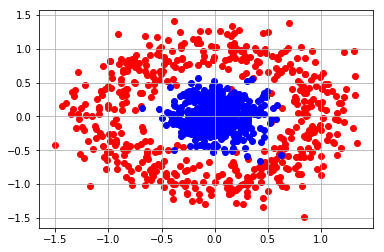

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
plt.scatter(X[y==1, 0], X[y==1, 1], c="b")

plt.grid()
plt.show();

# Build the Neural Network

In [4]:
M, N_INPUTS = X.shape
model = NeuralNetwork(optimizer=Adam(alpha=0.03), n_epochs=3_000, batch_size=256)

model.add(Dense(8, n_inputs=N_INPUTS, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(2, activation="softmax"))

## Training

In [5]:
model.fit(X, y)

Training: 100% [------------------------------------------------] Time: 0:00:17


NeuralNetwork(
    optimizer=<dojo.optimizers.Adam object at 0x1309db6d8>,
    n_epochs=3000,
    batch_size=256,
    loss=<dojo.losses.CrossEntropy object at 0x1309494a8>,
    verbose=False,
)

In [6]:
model.summary()

+---------------+
| Model Summary |
+---------------+
Input Shape: (2, 1)
+------------+----------------------+--------------+
| Layer Type | Number of Parameters | Output Shape |
+------------+----------------------+--------------+
| Dense      | 24                   | (8, 1)       |
| Dense      | 54                   | (6, 1)       |
| Dropout    | 0                    | (6, 1)       |
| Dense      | 14                   | (2, 1)       |
+------------+----------------------+--------------+
Total Number of Parameters: 92



## Learning Curve

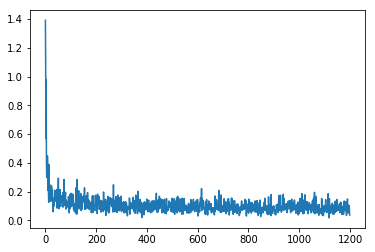

In [7]:
plt.plot(model._loss_values[::10]);

## Evaluate

In [8]:
model.evaluate(X, y)

0.988

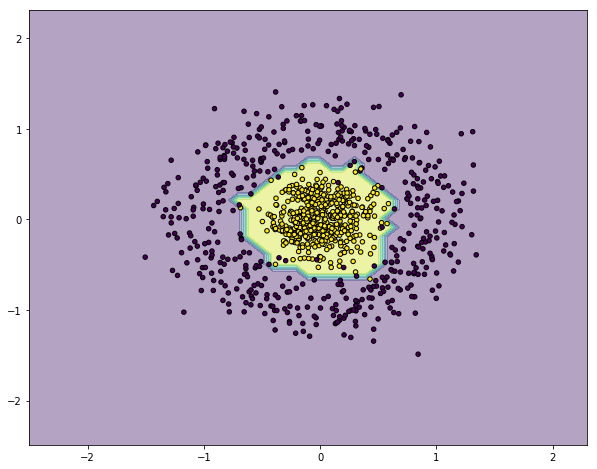

In [9]:
plot_decision_boundary(model, X, y)